# Pandas Introduction - DataFrame - Part 1

This notebook supplements the notebooks from Chapter 7.14 in ***Intro to Python for Computer Science and Data Science*** with more information on Pandas DataFrames. You should study both sets of notebooks.

The examples here were extracted and adapted from ***Python for Data Analysis*** by Wes McKinney ISBN: 9781449319793

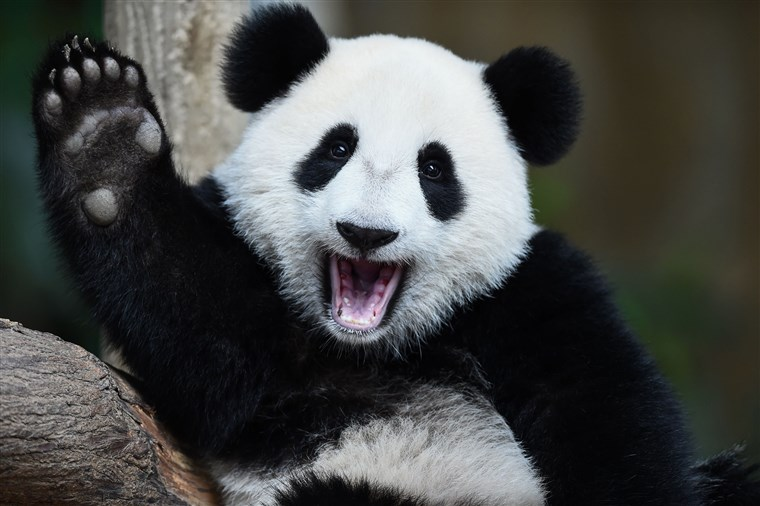

In [52]:
import numpy as np
from pandas import Series, DataFrame
import pandas as pd

### DataFrames

Data is often represented in a table format.  This is true for fields in records on a file, rows and columns in a spreadsheet, and in relational tables.  Pandas provides a data structure specifically to deal with this common data organization.

*DataFrames* are two-dimensional tables of columns of values with an index.  Columns may be of different types.  
Values need not be homogeneous.  Cells have both a row and column identifier, similar to the row and columns in spreadsheets.

From a machine learning perspective, consider the correspondence of the DataFrame data structure with our slide from the Data Science Introduction lecture describing observation vectors, features, and labels.  Observation vectors directly map to rows (index) in a DataFrame.  Features and labels correspond to specific columns.

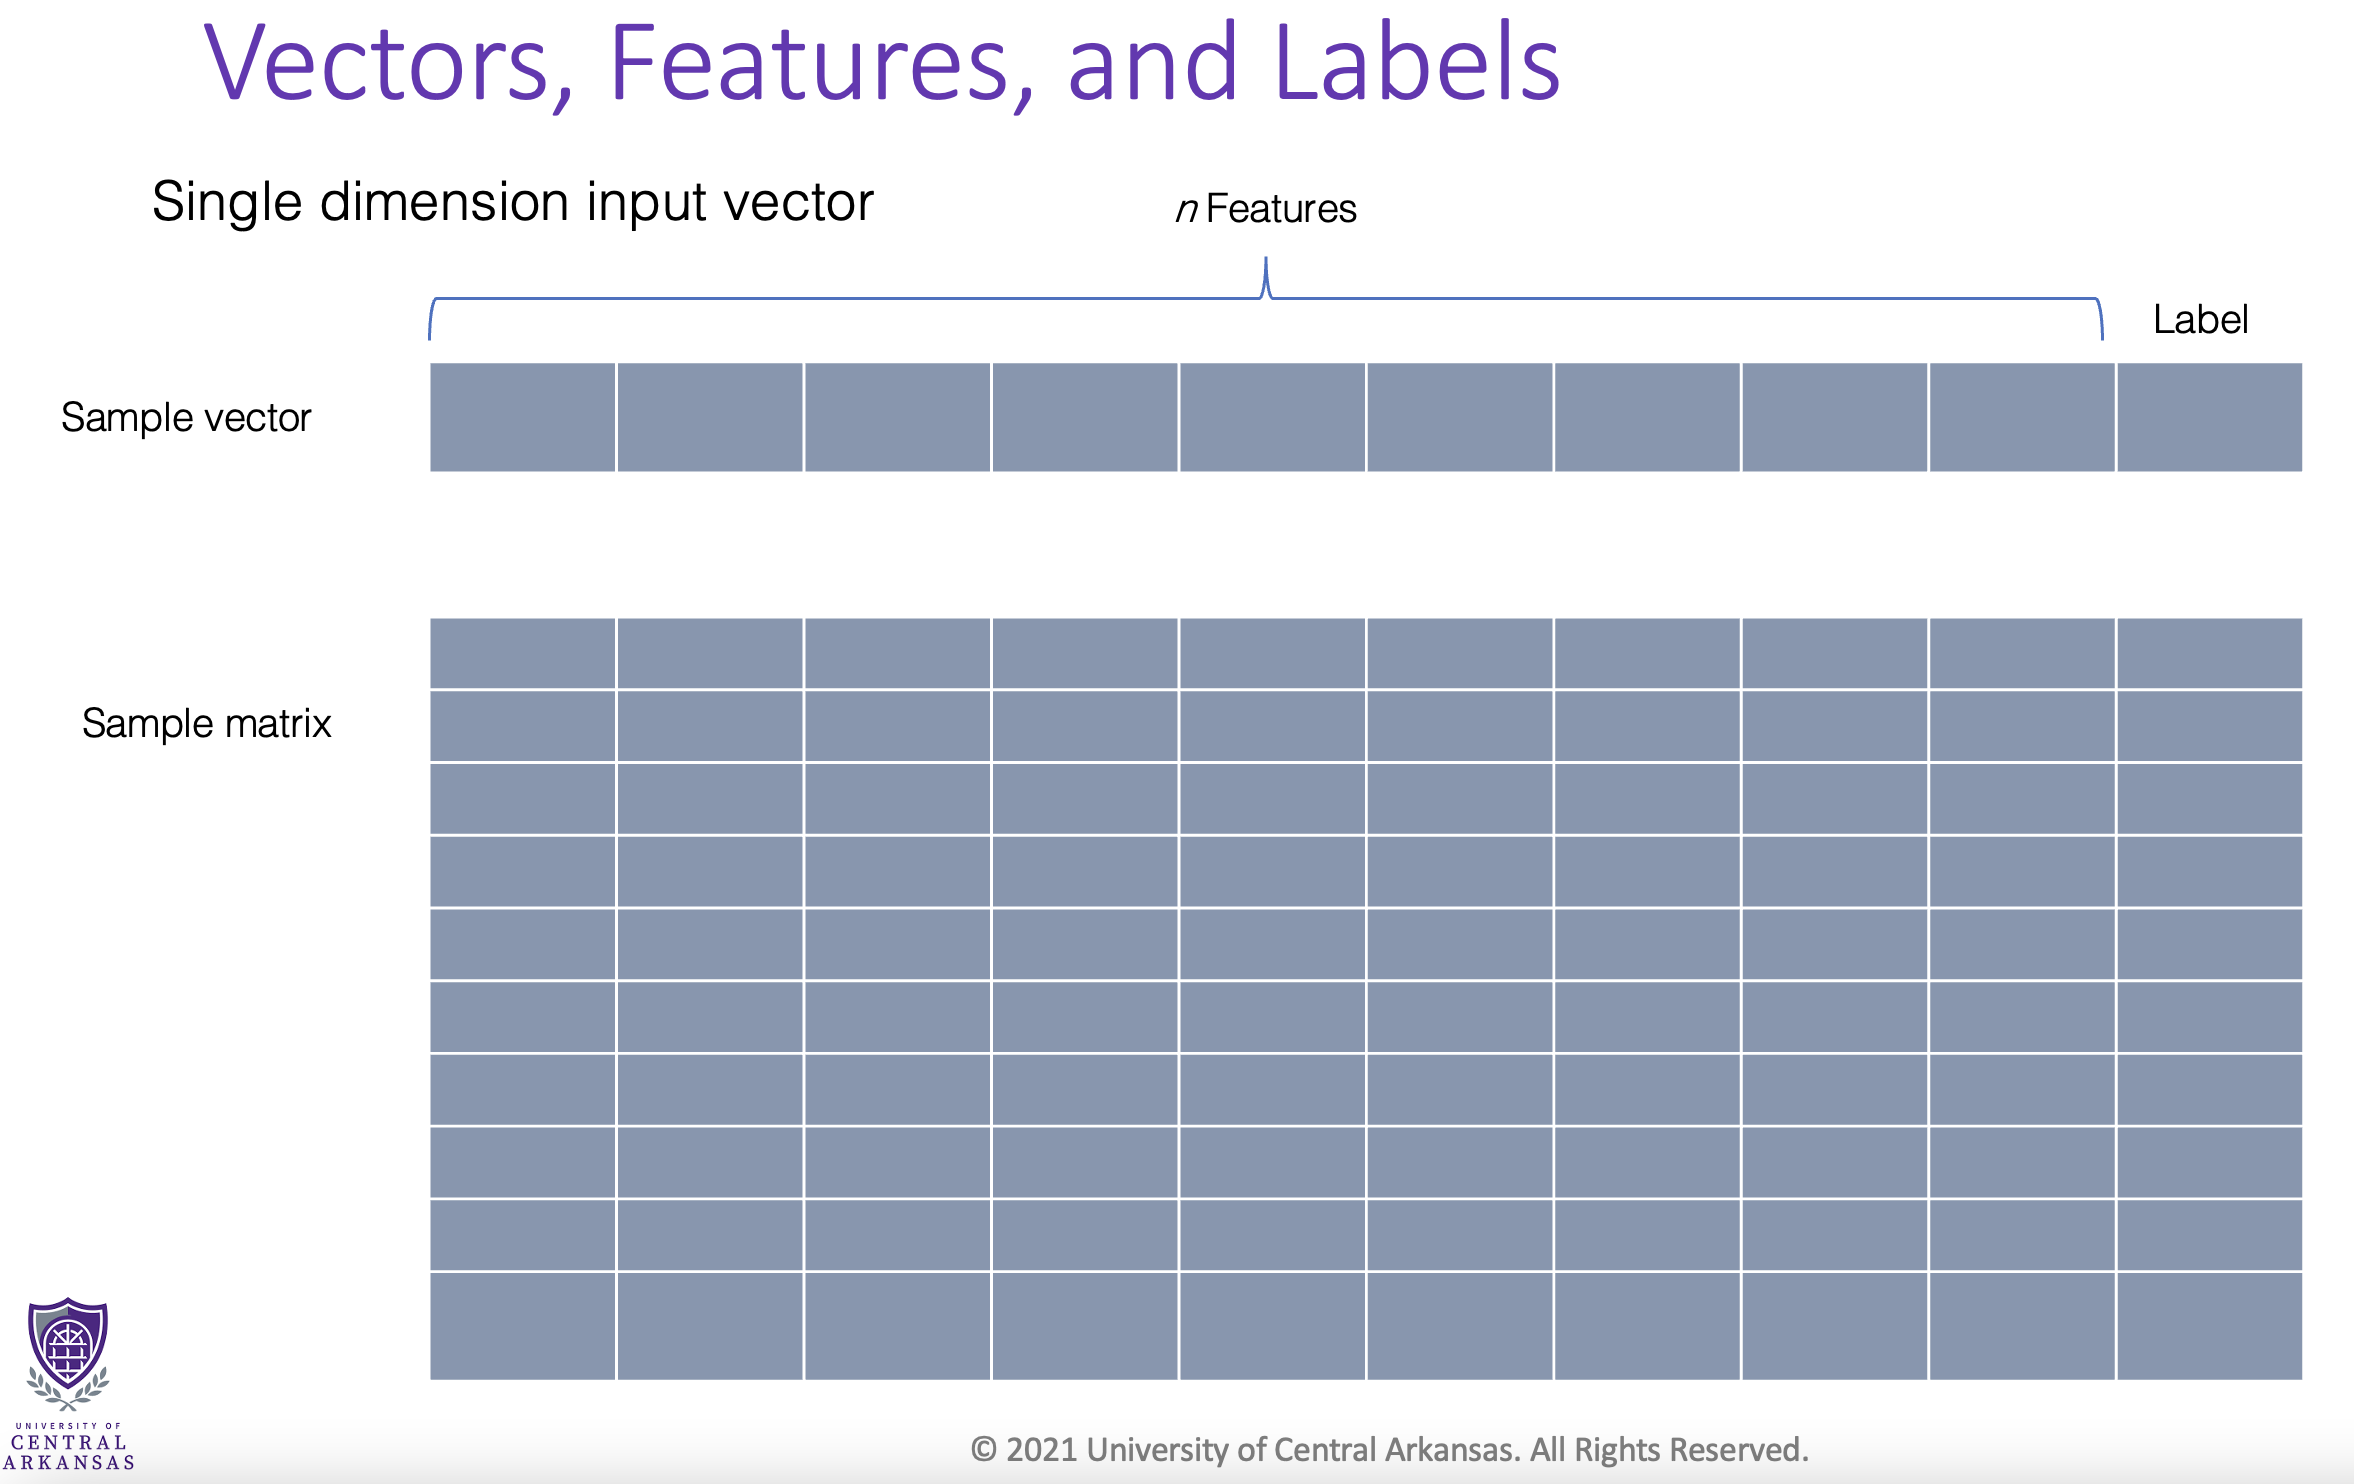

The Pandas DataFrame data structure and most of the associated methods have been widely adopted.  In particular, Spark has provided DataFrame capabilities that closely mirror Pandas.

Pandas is limited to working with data that will fit into RAM.  This works for many problems, but clearly not for very large data sets.  Spark is specifically designed to handle these very large data sets across a cluster of machines.

In this class, we focus on exploring Pandas DataFrames, knowing that most of this learning directly translates to Spark when you face larger data problems.

### Building a DataFrame

DataFrames can be considered a dictionary of Series where the dictionary key is the column.  This idea is one way to create a dataframe from a dictionary.  The dictionary keys correspond to columns and the list or array of values associated with the key become the row values.

In [53]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
       'year': [2000, 2001, 2002, 2001, 2002],
       'population': [1.5, 1.7, 3.6, 2.4, 2.9]}

In [54]:
data

{'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
 'year': [2000, 2001, 2002, 2001, 2002],
 'population': [1.5, 1.7, 3.6, 2.4, 2.9]}

In [55]:
df = DataFrame(data)

In [56]:
df

,state,year,population
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


Specifying the columns arranges the dataframe table and if you provide a column that doesn't exist, the values are filled with NaN.  As with Series, you can also name the index values.

In [57]:
df = DataFrame(data, 
               columns=['year', 'state', 'population', 'debt'], 
               index=['one', 'two', 'three', 'four', 'five'])

In [58]:
df

,year,state,population,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN


DataFrames have many useful methods and we will discuss many, but not all, of those methods in this notebook.  For example, the *columns* and *index* methods can be used to fetch the columns and indexes for the DataFrame.

In [59]:
df.columns

Index(['year', 'state', 'population', 'debt'], dtype='object')

In [60]:
df.index

Index(['one', 'two', 'three', 'four', 'five'], dtype='object')

## Retrieving Data from a Dataframe

Retrieve a column from a dataframe as if using a key with a dictionary or as an object atribute.  The column name is used like a dictionary key for reference.

Note that retrieving a column with the dictionary style can be a little confusing since it looks similar to a row index reference.  

In [61]:
df

,year,state,population,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN


In [62]:
df['population']

one      1.5
two      1.7
three    3.6
four     2.4
five     2.9
Name: population, dtype: float64

You can also reference columns directly as attributes of the dataframe.

In [63]:
df.population

one      1.5
two      1.7
three    3.6
four     2.4
five     2.9
Name: population, dtype: float64

In [64]:
df.year

one      2000
two      2001
three    2002
four     2001
five     2002
Name: year, dtype: int64

Specifying a list of columns returns the selected columns.

In [65]:
df[['population', 'year']]

,population,year
one,1.5,2000
two,1.7,2001
three,3.6,2002
four,2.4,2001
five,2.9,2002


## Modifying the contents of a Dataframe

Column values can be set via a scalar or an array.  A scalar sets **all** column values to the same scalar.  If an array or list is specified, it must match the number of rows in the dataframe.  A Series will be conformed (i.e., matched on index values) to the existing data.

As with Series, direct assignment to a DataFrame changes the values of the DataFrame (i.e., it is mutable and does not make a copy of the DataFrame).

In [66]:
df['debt'] = 16.5
df

,year,state,population,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5


In [68]:
df['debt'] = np.arange(5.)
df

,year,state,population,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0


In [69]:
df['debt'] = [34, 23, 1, 3, 6]
df

,year,state,population,debt
one,2000,Ohio,1.5,34
two,2001,Ohio,1.7,23
three,2002,Ohio,3.6,1
four,2001,Nevada,2.4,3
five,2002,Nevada,2.9,6


Note that the following conforming example makes unrepresented rows 'NaN'.  It does not keep previous values.

In [70]:
df

,year,state,population,debt
one,2000,Ohio,1.5,34
two,2001,Ohio,1.7,23
three,2002,Ohio,3.6,1
four,2001,Nevada,2.4,3
five,2002,Nevada,2.9,6


In [71]:
val = Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])
val

two    -1.2
four   -1.5
five   -1.7
dtype: float64

In [72]:
df['debt'] = val

Note that values for indexes 'one' and 'three' do ***not*** retain the values of 34 and 1, respectively, because the assigning Series replaces all values in the column.  Since the Series had missing values for some indexes, those values get set to NaN.

In [73]:
df

,year,state,population,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7


Adding a column to an existing dataframe is done through a simple assignnment. Columns can be deleted with 'del'.

In [74]:
df['income'] = [100, 150, 175, 120, 125]
df

,year,state,population,debt,income
one,2000,Ohio,1.5,NaN,100
two,2001,Ohio,1.7,-1.2,150
three,2002,Ohio,3.6,NaN,175
four,2001,Nevada,2.4,-1.5,120
five,2002,Nevada,2.9,-1.7,125


In [75]:
del df['income']
df

,year,state,population,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7


Nested dictionaries can be used to create a dataframe.  The outer dictionary key identifies the column and the innner identifies the row (index).  This allows selective assignment of values to specific rows and columns.

Note that rows will be assembled appropriately with NaN assigned to missing values.

In [76]:
pop_data = {'Nevada': {2001: 2.4, 2002: 2.9},
           'Ohio': {2000: 1.5, 2001: 1.7, 2002:3.6}}
df2 = DataFrame(pop_data)

# set the index and column names to something meaningful
df2.index.name = 'Year'
df2.columns.name = 'State'

df2

State,Nevada,Ohio
Year,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [77]:
df2.columns

Index(['Nevada', 'Ohio'], dtype='object', name='State')

In [78]:
df2.index

Int64Index([2001, 2002, 2000], dtype='int64', name='Year')

Without column references, the *values* method returns values for all cells in the DataFrame.

In [79]:
df2.values

array([[2.4, 1.7],
       [2.9, 3.6],
       [nan, 1.5]])

Specifying the column with *values* returns just that column.

In [80]:
df2['Nevada'].values

array([2.4, 2.9, nan])

The *T* method transposes a dataframe.

In [81]:
df2

State,Nevada,Ohio
Year,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [82]:
df2.T

Year,2001,2002,2000
State,,,
Nevada,2.4,2.9,NaN
Ohio,1.7,3.6,1.5


## Reindexing

Reindexing an existing Series or DataFrame *conforms* the object to the new index, introducing missing values as needed and dropping rows with an old indexes not present in the new index.  

The "fill_value" can be used to set the value of missing values (rather than the default "NaN").  Note that any *existing* NaN values are not set to the fill value.


In [83]:
df2

State,Nevada,Ohio
Year,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [84]:
df2.index

Int64Index([2001, 2002, 2000], dtype='int64', name='Year')

In [85]:
df2.reindex([2004, 2003, 2001, 2000], fill_value=0.0)

State,Nevada,Ohio
Year,,
2004,0.0,0.0
2003,0.0,0.0
2001,2.4,1.7
2000,NaN,1.5


Reindexing does **not** modify the original dataframe, but instead returns a new dataframe

In [86]:
df2

State,Nevada,Ohio
Year,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


Columns can also be reindexed using the "columns" parameter (note that "index" can be used to explcitly identify row reindexing rather than relying on positional).

In [87]:
states = ['Nevada', 'Ohio', 'California', 'Texas']

In [88]:
df2.reindex(columns=states, fill_value=0.0)

State,Nevada,Ohio,California,Texas
Year,,,,
2001,2.4,1.7,0.0,0.0
2002,2.9,3.6,0.0,0.0
2000,NaN,1.5,0.0,0.0


In [89]:
df2

State,Nevada,Ohio
Year,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [90]:
years = [2004, 2003, 2002, 2001, 2000]

In [91]:
df2.reindex(index=years, columns=states, fill_value=0.0)

State,Nevada,Ohio,California,Texas
Year,,,,
2004,0.0,0.0,0.0,0.0
2003,0.0,0.0,0.0,0.0
2002,2.9,3.6,0.0,0.0
2001,2.4,1.7,0.0,0.0
2000,NaN,1.5,0.0,0.0


In [92]:
df2

State,Nevada,Ohio
Year,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


The *drop* method can be used to drop indexes (rows) and returns a new dataframe.

In [93]:
df2.drop([2002, 2001])

State,Nevada,Ohio
Year,,
2000,NaN,1.5


In [94]:
df2

State,Nevada,Ohio
Year,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


Specifying the axis allows *drop* to operate on columns rather than rows.

Perhaps a bit confusing, but axis 1 is the "columns" axis.

In [95]:
df2.drop(['Ohio'], axis=1)

State,Nevada
Year,
2001,2.4
2002,2.9
2000,NaN


It seems clearer to explicitly refer to the 'columns' axis.

In [96]:
df2

State,Nevada,Ohio
Year,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [97]:
df2.drop(['Ohio'], axis='columns')

State,Nevada
Year,
2001,2.4
2002,2.9
2000,NaN


For demonstration purposes, let's create a new dataframe.

In [98]:
df3 = df2.reindex(index=years, columns=states, fill_value=0.0)
df3

State,Nevada,Ohio,California,Texas
Year,,,,
2004,0.0,0.0,0.0,0.0
2003,0.0,0.0,0.0,0.0
2002,2.9,3.6,0.0,0.0
2001,2.4,1.7,0.0,0.0
2000,NaN,1.5,0.0,0.0
